<a href="https://colab.research.google.com/github/tenochca/DataScienceProject/blob/main/finalproject_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_diabetes = pd.read_csv('/content/drive/MyDrive/DSC 343/diabetes_prediction_dataset.csv')
df_diabetes.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df_diabetes.shape

(100000, 9)

In [ ]:
df_diabetes.describe(include='all')
#desciptive statistics

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [ ]:
df_diabetes.dtypes
#checking data types

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
#checking for missing variables
df_diabetes[df_diabetes.isnull()].shape
#there are no missing values

(100000, 9)

In [ ]:
#drop duplicates
df_diabetes.drop_duplicates(inplace = True)
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df_diabetes.shape
#new number of observations

(96146, 9)

In [ ]:
col_to_move = df_diabetes.pop('diabetes')
df_diabetes.insert(0, 'diabetes', col_to_move)
#moving diabetes to the first column

In [ ]:
#correlation analysis
corr_matrix = df_diabetes.corr()
print(corr_matrix)

                     diabetes       age  hypertension  heart_disease  \
diabetes             1.000000  0.264927      0.195710       0.170711   
age                  0.264927  1.000000      0.257305       0.238451   
hypertension         0.195710  0.257305      1.000000       0.119982   
heart_disease        0.170711  0.238451      0.119982       1.000000   
bmi                  0.214932  0.344797      0.148111       0.061376   
HbA1c_level          0.406408  0.106719      0.081441       0.068140   
blood_glucose_level  0.424336  0.114317      0.084834       0.070832   

                          bmi  HbA1c_level  blood_glucose_level  
diabetes             0.214932     0.406408             0.424336  
age                  0.344797     0.106719             0.114317  
hypertension         0.148111     0.081441             0.084834  
heart_disease        0.061376     0.068140             0.070832  
bmi                  1.000000     0.084423             0.092543  
HbA1c_level          0.0844

<ipython-input-24-b2bd952a5579>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_diabetes.corr()


<Axes: ylabel='Frequency'>

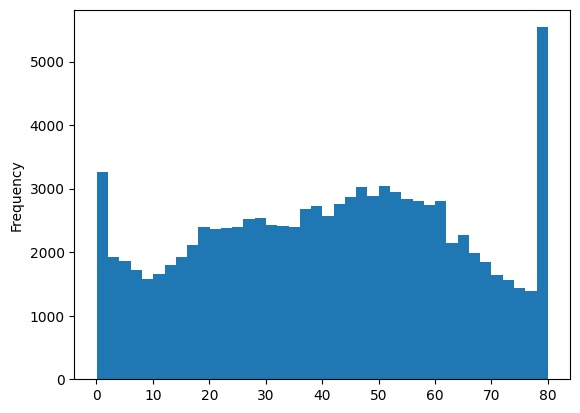

In [ ]:
#distribution analysis
df_diabetes["age"].plot(kind="hist", bins=40)

<Axes: ylabel='Frequency'>

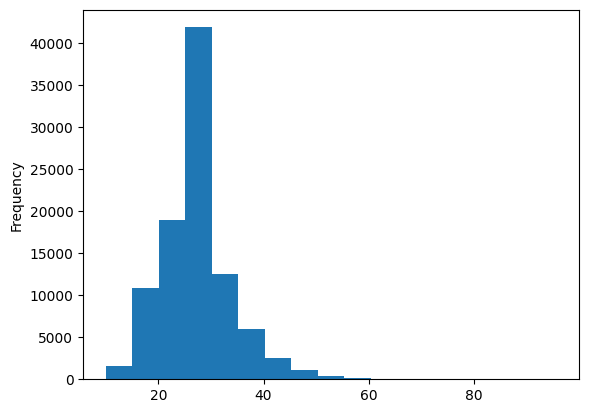

In [ ]:
df_diabetes["bmi"].plot(kind="hist", bins=17)

<Axes: ylabel='Frequency'>

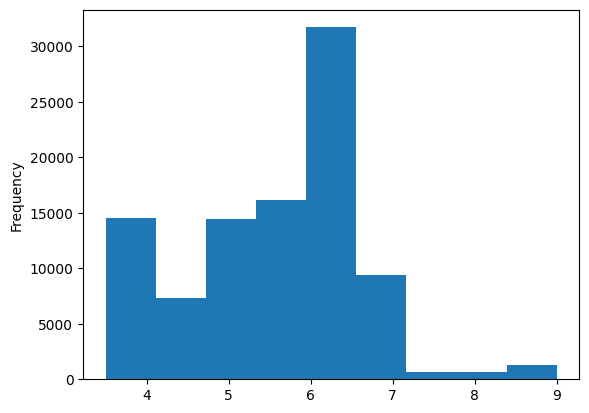

In [ ]:
df_diabetes["HbA1c_level"].plot(kind="hist", bins=9)

<Axes: ylabel='Frequency'>

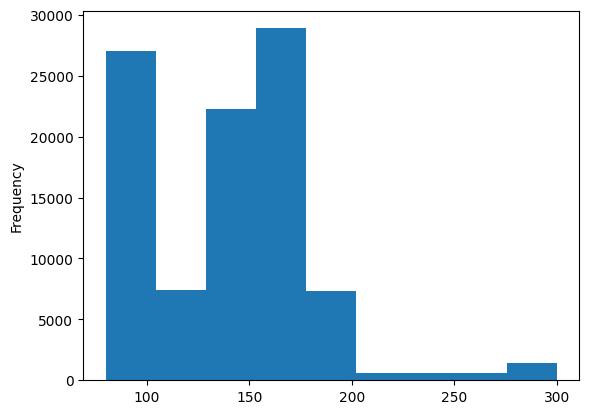

In [ ]:
df_diabetes["blood_glucose_level"].plot(kind="hist", bins=9)

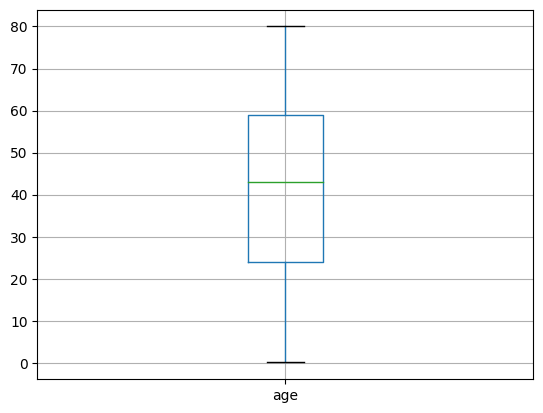

In [ ]:
#boxplots
df_diabetes.boxplot('age')
plt.show()

In [ ]:
df_diabetes.boxplot('bmi')
plt.show()

In [ ]:

df_diabetes.boxplot("HbA1c_level")

In [ ]:
df_diabetes.boxplot("blood_glucose_level")

In [ ]:
#putting the bmi column into bins
bmi_bins = pd.qcut(df_diabetes.bmi, 3)
bmi_bins.head(10)

0    (10.009, 25.3]
1     (25.3, 27.73]
2     (25.3, 27.73]
3    (10.009, 25.3]
4    (10.009, 25.3]
5     (25.3, 27.73]
6    (10.009, 25.3]
7    (10.009, 25.3]
8    (27.73, 95.69]
9     (25.3, 27.73]
Name: bmi, dtype: category
Categories (3, interval[float64, right]): [(10.009, 25.3] < (25.3, 27.73] < (27.73, 95.69]]

In [ ]:
#specify quantiles for discretization, the reange for a nomral bmi is low compared to the range of the data
bmi_bins = pd.qcut(df_diabetes.bmi, [0, 0.2, 0.3, 1], labels=["low", "norm", "high"])
bmi_bins.head(10)

0    high
1    high
2    high
3    norm
4     low
5    high
6     low
7    norm
8    high
9    high
Name: bmi, dtype: category
Categories (3, object): ['low' < 'norm' < 'high']

In [ ]:
df_diabetes["bmi-bins"] = bmi_bins
df_diabetes.head(10)
#adding new column to dataframe

,diabetes,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,bmi-bins
0,0,Female,80.0,0,1,never,25.19,6.6,140,high
1,0,Female,54.0,0,0,No Info,27.32,6.6,80,high
2,0,Male,28.0,0,0,never,27.32,5.7,158,high
3,0,Female,36.0,0,0,current,23.45,5.0,155,norm
4,0,Male,76.0,1,1,current,20.14,4.8,155,low
5,0,Female,20.0,0,0,never,27.32,6.6,85,high
6,1,Female,44.0,0,0,never,19.31,6.5,200,low
7,0,Female,79.0,0,0,No Info,23.86,5.7,85,norm
8,0,Male,42.0,0,0,never,33.64,4.8,145,high
9,0,Female,32.0,0,0,never,27.32,5.0,100,high


In [ ]:
#dropping the old bmi column
df_diabetes.drop(columns=['bmi'], inplace=True)
df_diabetes.head()

,diabetes,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,bmi-bins
0,0,Female,80.0,0,1,never,6.6,140,high
1,0,Female,54.0,0,0,No Info,6.6,80,high
2,0,Male,28.0,0,0,never,5.7,158,high
3,0,Female,36.0,0,0,current,5.0,155,norm
4,0,Male,76.0,1,1,current,4.8,155,low


In [ ]:
#getting the dummies
df_diabetes = pd.get_dummies(df_diabetes)
df_diabetes.head(10)

,diabetes,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,bmi-bins_low,bmi-bins_norm,bmi-bins_high
0,0,80.0,0,1,6.6,140,1,0,0,0,0,0,0,1,0,0,0,1
1,0,54.0,0,0,6.6,80,1,0,0,1,0,0,0,0,0,0,0,1
2,0,28.0,0,0,5.7,158,0,1,0,0,0,0,0,1,0,0,0,1
3,0,36.0,0,0,5.0,155,1,0,0,0,1,0,0,0,0,0,1,0
4,0,76.0,1,1,4.8,155,0,1,0,0,1,0,0,0,0,1,0,0
5,0,20.0,0,0,6.6,85,1,0,0,0,0,0,0,1,0,0,0,1
6,1,44.0,0,0,6.5,200,1,0,0,0,0,0,0,1,0,1,0,0
7,0,79.0,0,0,5.7,85,1,0,0,1,0,0,0,0,0,0,1,0
8,0,42.0,0,0,4.8,145,0,1,0,0,0,0,0,1,0,0,0,1
9,0,32.0,0,0,5.0,100,1,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_diabetes.drop(columns=['smoking_history_ever'], inplace=True)
#dropped smoking history ever because it is a typo

In [ ]:
diabetes_names = df_diabetes.columns.values
diabetes_names

array(['diabetes', 'age', 'hypertension', 'heart_disease', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current',
       'bmi-bins_low', 'bmi-bins_norm', 'bmi-bins_high'], dtype=object)

In [ ]:
#assigning the y and x variables
y = df_diabetes['diabetes']
x = df_diabetes[diabetes_names[1:]]
x.head()

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current,bmi-bins_low,bmi-bins_norm,bmi-bins_high
0,80.0,0,1,6.6,140,1,0,0,0,0,0,1,0,0,0,1
1,54.0,0,0,6.6,80,1,0,0,1,0,0,0,0,0,0,1
2,28.0,0,0,5.7,158,0,1,0,0,0,0,1,0,0,0,1
3,36.0,0,0,5.0,155,1,0,0,0,1,0,0,0,0,1,0
4,76.0,1,1,4.8,155,0,1,0,0,1,0,0,0,1,0,0


# **MODEL TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)
#splitting into training a testing

In [ ]:
from sklearn import metrics
#function to calculate evlauation metrics

def measure_performance(x, y, clf, show_accuracy=True, show_precision=True, show_recall=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(x)

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_precision:
        print("Precision:{0:.3f}".format(metrics.precision_score(y, y_pred)),"\n")
    if show_recall:
        print("Recall:{0:.3f}".format(metrics.recall_score(y, y_pred)),"\n")


In [ ]:
#fitting the model to the training data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=75, min_samples_leaf=1, min_samples_split=2, max_depth=None)
rf = rf.fit(x_train, y_train)

In [ ]:
#evluation metrics on training data
measure_performance(x_train, y_train, rf, show_accuracy=True, show_precision=True, show_recall=True, show_classification_report=True, show_confussion_matrix=True)

Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     70061
           1       0.97      0.92      0.94      6855

    accuracy                           0.99     76916
   macro avg       0.98      0.96      0.97     76916
weighted avg       0.99      0.99      0.99     76916
 

Confusion matrix
[[69896   165]
 [  567  6288]] 

Accuracy:0.990 

Precision:0.974 

Recall:0.917 



In [ ]:
measure_performance(x_test, y_test, rf, show_accuracy=True, show_precision=True, show_recall=True, show_classification_report=True, show_confussion_matrix=True)
#evaluation on testing data

Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17603
           1       0.85      0.71      0.78      1627

    accuracy                           0.97     19230
   macro avg       0.91      0.85      0.88     19230
weighted avg       0.96      0.97      0.96     19230
 

Confusion matrix
[[17404   199]
 [  470  1157]] 

Accuracy:0.965 

Precision:0.853 

Recall:0.711 



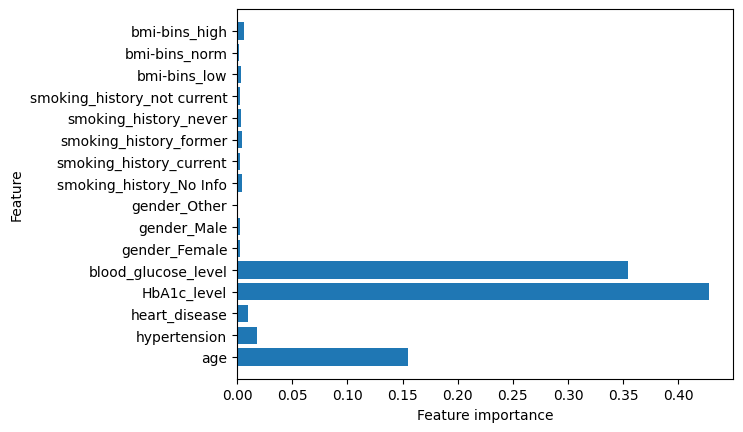

In [ ]:
#funtion for feature importance
def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

features = diabetes_names[1:]
plot_feature_importances(rf, len(features), features)